## Load packages and set environment

In [2]:
import numpy as np
import pandas as pd

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

import seaborn as sns #; sns.set()
import matplotlib.pyplot as plt
import datetime as dt
from mpl_toolkits.mplot3d import Axes3D
from datetime import time
import matplotlib.dates as mdates
%matplotlib notebook
%matplotlib inline
#plt.style.use('seaborn')
sns.set_palette("muted")
import warnings
warnings.filterwarnings('ignore')

### Import data into working environment

In [3]:
xl = pd.ExcelFile("data/Albumin.xlsx")

In [4]:
liste=xl.sheet_names

In [5]:
disct={}
for i in liste:
    disct[i]=pd.DataFrame(xl.parse(i))
    


## Years in Data set
- from 2006 to 2016

In [6]:
print(disct.keys())

dict_keys(['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'])


In [7]:
a={}
for i in liste:
    a[i]=(disct[i].shape)
    

## Number of each observation and variable count by year

In [8]:
print(a)

{'2006': (22, 239), '2007': (27, 239), '2008': (54, 240), '2009': (94, 240), '2010': (165, 240), '2011': (202, 252), '2012': (276, 295), '2013': (411, 305), '2014': (504, 323), '2015': (311, 274), '2016': (883, 274)}


### Number of observation and variables in each year. 
- In 2006, we have 22 observation and 239 variables. 
- In 2016, we have 883 observation and 274 variables. 
- Information of other years can be seen above.

In [9]:
l=[disct['2006'],disct['2007'],disct['2008'],disct['2009'],disct['2010'],disct['2011'],
   disct['2012'],disct['2013'],disct['2014'],disct['2015'],disct['2016']]



In [10]:
result=pd.concat(l,axis=0,join='outer',sort=False,ignore_index=True)

### Data combined into a result file, data has 2949 rows and 349 columns

In [11]:
result.shape

(2949, 349)

### Subset data sets.
- I exclude observations if we dont have value for PRALBUM. Hence, we have 843 cases in our dataset and 349 variables.

In [12]:
result=result[result["PRALBUM"]!=-99]

In [13]:
result.shape

(843, 349)

### Assign NAN() if missing

In [14]:
result[result==-99] = np.nan
result[result=='NA'] = np.nan

In [21]:
result.to_csv("data_ready.csv", index=False)

# Descriptive statistics
- ## Independent variables

    

- <b>PRALBUM</b> has mean 3.75 with max 5.20. You can see more details below.

In [20]:
result.PRALBUM.describe()

count    843.000000
mean       3.752788
std        0.603829
min        1.600000
25%        3.400000
50%        3.800000
75%        4.200000
max        5.200000
Name: PRALBUM, dtype: float64

#### Histogram of <b>PRALBUM</b>

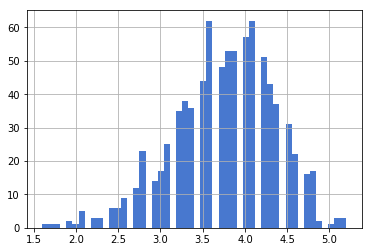

In [76]:
hist = result.PRALBUM.hist(bins=50)

- <b>SEX</b>: Majority of population is female. 458 females and 384 males and one missing

In [77]:


result.SEX.value_counts(dropna=False)

female    458
male      384
NaN         1
Name: SEX, dtype: int64

- We have 831 missing in <b>RACE</b> variable so, it is better not to use in our analysis

In [78]:
result.RACE.value_counts(dropna=False)

NaN                              831
White, Not of Hispanic Origin     12
Name: RACE, dtype: int64

- <b>ANESTHES</b> majority of them is General anesthes

In [79]:
result.ANESTHES.value_counts(dropna=False)

General            752
Spinal              79
MAC/IV Sedation     10
Other                1
Regional             1
Name: ANESTHES, dtype: int64

## Covariate

- <b>STEROID</b>. Yes is 25.

In [80]:
result.STEROID.value_counts(dropna=False)

No     818
Yes     25
Name: STEROID, dtype: int64

- <b>HEIGHT</b>. Height variable has 39 missing. (-99)

In [81]:
result.HEIGHT.value_counts(dropna=False)

 66.0    92
 64.0    73
 67.0    64
 62.0    62
 68.0    58
 63.0    57
 65.0    54
 69.0    53
 70.0    50
 71.0    50
NaN      39
 72.0    38
 61.0    38
 60.0    32
 73.0    29
 74.0    15
 59.0    14
 75.0    11
 58.0     5
 76.0     3
 57.0     2
 49.0     1
 50.0     1
 78.0     1
 56.0     1
Name: HEIGHT, dtype: int64

- <b>HEIGHT</b> Box plot

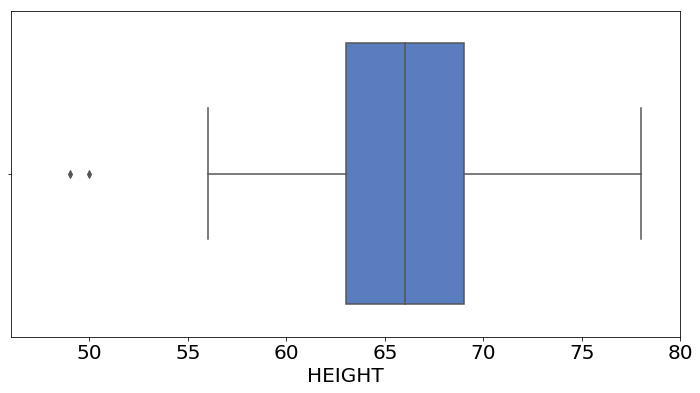

In [82]:
fig=plt.figure(figsize=(12, 6))# create figure
ax = sns.boxplot(result['HEIGHT'])
plt.xlim(46, 80)
plt.xlabel('HEIGHT', fontsize = 20)
plt.xticks(fontsize = 20);

- <b>Diabetes</b> 693 of them is No.

In [83]:
result.DIABETES.value_counts(dropna=False)

NO             693
INSULIN         78
NON-INSULIN     65
ORAL             7
Name: DIABETES, dtype: int64

- <b>RENAFAIL</b> 839 of them is No.

In [84]:
result.RENAFAIL.value_counts(dropna=False)

No     839
Yes      3
NaN      1
Name: RENAFAIL, dtype: int64

- <b>DIALYSIS</b> 832 of them is No.

In [85]:
result.DIALYSIS.value_counts(dropna=False)

No     832
Yes     10
NaN      1
Name: DIALYSIS, dtype: int64

- <b>HXCOPD</b> 786 of them is No.

In [86]:
result.HXCOPD.value_counts(dropna=False)

No     786
Yes     57
Name: HXCOPD, dtype: int64

- <b>SMOKE</b> 586 of them is No.

In [87]:
result.SMOKE.value_counts(dropna=False)

No     586
Yes    257
Name: SMOKE, dtype: int64

- <b>PACKS</b> more than 700 of them is missing. So, we should not use this variable as independent variable.

In [88]:
result.PACKS.value_counts(dropna=False)

NaN       718
 0.0       75
 20.0       6
 10.0       4
 40.0       4
 30.0       3
 1.0        3
 25.0       3
 13.0       3
 80.0       3
 50.0       2
 45.0       2
 8.0        2
 3.0        2
 36.0       1
 9.0        1
 5.0        1
 22.0       1
 60.0       1
 15.0       1
 21.0       1
 35.0       1
 7.0        1
 2.0        1
 150.0      1
 17.0       1
 18.0       1
Name: PACKS, dtype: int64

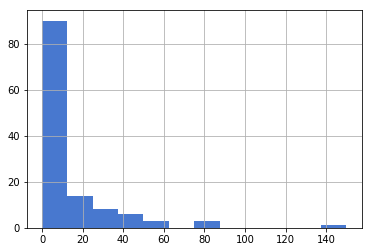

In [89]:
hist = result.PACKS.hist(bins=12)

- <b>STEROID</b> 818 of them is No.

In [90]:
result.STEROID.value_counts(dropna=False)

No     818
Yes     25
Name: STEROID, dtype: int64

- <b>WNDCLAS</b>

In [91]:
result.WNDCLAS.value_counts(dropna=False)

1-Clean                 733
2-Clean/Contaminated     62
3-Contaminated           38
4-Dirty/Infected         10
Name: WNDCLAS, dtype: int64

- <b>ASACLAS</b>

In [92]:
result.ASACLAS.value_counts(dropna=False)

2-Mild Disturb      411
3-Severe Disturb    323
1-No Disturb         61
4-Life Threat        47
None assigned         1
Name: ASACLAS, dtype: int64

## Outcomes:

- <b>WNDINF</b>

In [93]:
result.WNDINF.value_counts(dropna=False)

No     766
Yes     77
Name: WNDINF, dtype: int64

- <b>WNDINFD</b> 

In [94]:
result.WNDINFD.value_counts(dropna=False)

No Complication        834
Deep Incisional SSI      9
Name: WNDINFD, dtype: int64

- <b>DWNDINFD</b> 834 missing 

In [95]:
result.DWNDINFD.value_counts(dropna=False)

NaN      834
 18.0      2
 15.0      2
 22.0      1
 10.0      1
 14.0      1
 23.0      1
 19.0      1
Name: DWNDINFD, dtype: int64

- <b>NDEHIS</b> 

In [96]:
result.NDEHIS.value_counts(dropna=False)

0    838
1      5
Name: NDEHIS, dtype: int64

- <b>DEHIS</b> 

In [97]:
result.DEHIS.value_counts(dropna=False)

No Complication     838
Wound Disruption      5
Name: DEHIS, dtype: int64

- <b>DDEHIS</b> 838 missing

In [98]:
result.DDEHIS.value_counts(dropna=False)

NaN      838
 15.0      2
 12.0      1
 23.0      1
 17.0      1
Name: DDEHIS, dtype: int64

- <b>PRSEPIS</b> 803 is NONE

In [99]:
result.PRSEPIS.value_counts(dropna=False)

None      803
SIRS       36
Sepsis      3
NaN         1
Name: PRSEPIS, dtype: int64

- <b>SUPINFEC</b> 

In [100]:
result.SUPINFEC.value_counts(dropna=False)

No Complication               834
Superficial Incisional SSI      9
Name: SUPINFEC, dtype: int64

- <b>DSUPINFEC</b> 834 is missing 

In [101]:
result.DSUPINFEC.value_counts(dropna=False)

NaN      834
 11.0      2
 20.0      1
 28.0      1
 15.0      1
 30.0      1
 29.0      1
 5.0       1
 18.0      1
Name: DSUPINFEC, dtype: int64

- <b>NSUPINFEC</b> 

In [102]:
result.NSUPINFEC.value_counts(dropna=False)

0    834
1      9
Name: NSUPINFEC, dtype: int64

- <b>NWNDINFD</b> 

In [103]:
result.NWNDINFD.value_counts(dropna=False)

0    834
1      9
Name: NWNDINFD, dtype: int64

- <b>WNDINFD</b> 

In [104]:
result.WNDINFD.value_counts(dropna=False)

No Complication        834
Deep Incisional SSI      9
Name: WNDINFD, dtype: int64

- <b>READMISSION1 </b> 

In [105]:
result.READMISSION1.value_counts(dropna=False)

No     641
NaN    158
Yes     44
Name: READMISSION1, dtype: int64

- <b>READMPODAYS1</b> 

In [106]:
result.READMPODAYS1.value_counts(dropna=False)

NaN      800
 17.0      5
 8.0       3
 20.0      3
 19.0      3
 22.0      2
 3.0       2
 30.0      2
 16.0      2
 13.0      2
 10.0      2
 12.0      2
 15.0      2
 26.0      1
 28.0      1
 7.0       1
 18.0      1
 23.0      1
 9.0       1
 11.0      1
 29.0      1
 4.0       1
 2.0       1
 5.0       1
 27.0      1
 14.0      1
Name: READMPODAYS1, dtype: int64

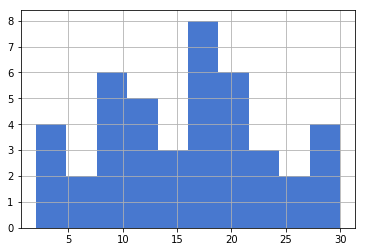

In [107]:
hist = result.READMPODAYS1.hist(bins=10)

- <b>UNPLANNEDREADMISSION1</b> 

In [108]:
result.UNPLANNEDREADMISSION1.value_counts(dropna=False)

NaN    799
Yes     40
No       4
Name: UNPLANNEDREADMISSION1, dtype: int64

- <b>READMRELATED1</b> 

In [109]:
result.READMRELATED1.value_counts(dropna=False)

NaN    803
Yes     30
No      10
Name: READMRELATED1, dtype: int64

- <b>READMSUSPREASON1</b> 

In [110]:
result.READMSUSPREASON1.value_counts(dropna=False)

NaN                                  813
Deep Incisional SSI                    7
Other (list ICD 9 code)                7
Sepsis                                 3
Organ/Space SSI                        3
Other (list ICD 10 code)               2
Pulmonary Embolism                     2
Pneumonia                              2
Acute Renal Failure                    1
Superficial Incisional SSI             1
Wound Disruption                       1
Vein Thrombosis Requiring Therapy      1
Name: READMSUSPREASON1, dtype: int64

### Infection combined

In [136]:
result['Infection Combined'] = np.where(result['WNDINF']=='Yes', 1, 0)

In [137]:
result['Infection Combined'] = np.where(result['WNDINFD']=='Deep Incisional SSI', 1, 0)

In [138]:
result['Infection Combined'].value_counts(dropna=False)

0    835
1      9
Name: Infection Combined, dtype: int64